<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Underwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

Underwriting (UW) is perhaps one of the most critical functions of Insurance Industry. Significant amount of cost and efforts are dedicated for this. With the advent of widespread use of Artificial Intelligence, there has been lot of interest in leveraging AI for UW. It has the potential to become a potent aid for Underwriters - less need of UW Resources per application, expedited UW processes, significant Cost and time savings. 


# Problem Description


Prudential Life Insurance made available their UW dataset for 60,000 customers. 

The dataset had 8 risk classes, coded as 1 to 8, with 1 being the highest risk. 


There are 126 inputs available, pertaining to health, weight, medical test, employment history, family history etc. 


The variables are masked by naming them in generic fashion like MEDICAL_KEYWORD, EMPLOYEMENT_INFO etc. 



#### The objective is to develop a predictive model which can classify these risk classes with very high degree of accuracy, maintaining reasonably high precision and recall within each classes. 


In [26]:
from google.colab import files

files.upload()

Saving test.csv to test.csv


{'test.csv': b'Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_Histor

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(13), int64(114), object(1)
memory usage: 58.0+ MB


In [30]:
df_train.dtypes.value_counts()

int64      114
float64     13
object       1
dtype: int64

In [31]:
string_cols = []
for i in df_train.columns:
  if df_train[i].dtypes == 'object':
    string_cols.append(i)
string_cols

['Product_Info_2']

In [32]:
df_train.shape

(59381, 128)

In [33]:
df_test.shape

(19765, 127)

#### checking for null values

In [34]:
df_train.isnull().sum()[df_train.isnull().sum() !=0]

Series([], dtype: int64)

**This implies that test data has null values**

In [35]:
df_train.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0                   0                   0   
1    ...                      0                   0                   0   
2    ...                      0                   0                   0   
3    ...                      0                   0                   0   
4    ...                      0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [36]:
df_train.describe()

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht            Wt      ...       Medical_Keyword_40  \
count  59381.000000  59381.000000      ...             59381.000000   
mean       0.707283      0.292587      ...                 0.056954   
std        0.074239      0.089037      ...                 0.231757   
min        0.000000      0.000000      ...                 0.000000   
25%        0.654545      0.225941      ...                 0.000000   
50%        0.709091      0.288703      ...                 0.000000   
75%        0.763636      0.345188      ...                 0.000000   
max        1.000000      1.000000      ...                 1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 127 columns]

In [0]:
for cols in df_train.columns:
  if df_train[cols].count() != 59381:
    print(cols,":",df_train[cols].count())

**Hence confirmed no null values**

In [38]:
df_test.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   1               1             D3              26        0.487179   
1   3               1             A2              26        0.076923   
2   4               1             D3              26        0.144667   
3   9               1             A1              26        0.151709   
4  12               1             A1              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               3               1  0.611940  0.781818   
1               2               3               1  0.626866  0.727273   
2               2               3               1  0.582090  0.709091   
3               2               1               1  0.522388  0.654545   
4               2               3               1  0.298507  0.672727   

          ...          Medical_Keyword_39  Medical_Keyword_40  \
0         ...                           0                   0   
1         ...                           0                   0   
2         ...                           0                   0   
3         ...                           0                   0   
4         ...                           0                   0   

   Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_47  Medical_Keyword_48  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   1                   1  
4                   0                   0  

[5 rows x 127 columns]

In [39]:
df_test.shape[0]

19765

In [0]:
for cols in df_test.columns:
  if df_test[cols].count() != df_test.shape[0] :
    print(cols,":",df_test[cols].count())

Medical_History_1 : 16793
Medical_History_10 : 201
Medical_History_15 : 4901
Medical_History_24 : 1180
Medical_History_32 : 351


In [0]:
df_test.isnull().sum()[df_test.isnull().sum() !=0]

Medical_History_1      2972
Medical_History_10    19564
Medical_History_15    14864
Medical_History_24    18585
Medical_History_32    19414
dtype: int64

**Impute missing values with mean/ median / mode.**

In [0]:
missing_data_cols = ['Medical_History_1', 'Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']

In [41]:
df_test[missing_data_cols].head(10)


Medical_History_1  Medical_History_10  Medical_History_15  \
0                2.0                 NaN                 NaN   
1                5.0                 NaN               110.0   
2                3.0                 NaN               240.0   
3                NaN                 NaN                 NaN   
4               18.0                 NaN               188.0   
5                4.0                 NaN                 NaN   
6               21.0                 NaN                82.0   
7                0.0                 NaN                 NaN   
8                2.0                 NaN                 NaN   
9                NaN                 NaN                 NaN   

   Medical_History_24  Medical_History_32  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  
5                 NaN                 NaN  
6                 NaN                 NaN  
7                 NaN                 NaN  
8                 NaN                 NaN  
9                 NaN                 NaN

In [42]:
df_test['Medical_History_1'].value_counts()[:5]

1.0    2454
2.0    1856
3.0    1639
0.0    1547
4.0    1244
5.0    1172
Name: Medical_History_1, dtype: int64

In [43]:
df_test['Medical_History_1'].value_counts().index[0],df_test['Medical_History_10'].value_counts().index[0]

(1.0, 240.0)

In [0]:
df_test[missing_data_cols] = df_test[missing_data_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [45]:
df_test[missing_data_cols].head(10)

Medical_History_1  Medical_History_10  Medical_History_15  \
0                2.0               240.0               240.0   
1                5.0               240.0               110.0   
2                3.0               240.0               240.0   
3                1.0               240.0               240.0   
4               18.0               240.0               188.0   
5                4.0               240.0               240.0   
6               21.0               240.0                82.0   
7                0.0               240.0               240.0   
8                2.0               240.0               240.0   
9                1.0               240.0               240.0   

   Medical_History_24  Medical_History_32  
0                 0.0                 0.0  
1                 0.0                 0.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  
5                 0.0                 0.0  
6                 0.0                 0.0  
7                 0.0                 0.0  
8                 0.0                 0.0  
9                 0.0                 0.0

In [46]:
df_train['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_train['Product_Info_2'])
encoder_val = encoder.transform(df_train['Product_Info_2'])
encoder_val

array([16,  0, 18, ..., 18, 15,  7])

In [0]:
df_train['Product_Info_2'] = encoder_val

In [49]:
df_train.head()

Id  Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1              16              10        0.076923   
1   5               1               0              26        0.076923   
2   6               1              18              26        0.076923   
3   7               1              17              10        0.487179   
4   8               1              15              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0                   0                   0   
1    ...                      0                   0                   0   
2    ...                      0                   0                   0   
3    ...                      0                   0                   0   
4    ...                      0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [0]:
X = df_train.drop(['Id', 'Response'], axis=1)

In [0]:
Y = df_train['Response']

In [52]:
X.head()

Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0               1              16              10        0.076923   
1               1               0              26        0.076923   
2               1              18              26        0.076923   
3               1              17              10        0.487179   
4               1              15              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

         Wt         ...          Medical_Keyword_39  Medical_Keyword_40  \
0  0.148536         ...                           0                   0   
1  0.131799         ...                           0                   0   
2  0.288703         ...                           0                   0   
3  0.205021         ...                           0                   0   
4  0.234310         ...                           0                   0   

   Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_47  Medical_Keyword_48  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 126 columns]

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 126 entries, Product_Info_1 to Medical_Keyword_48
dtypes: float64(13), int64(113)
memory usage: 57.1 MB


# Visualization of Response Variable distibution

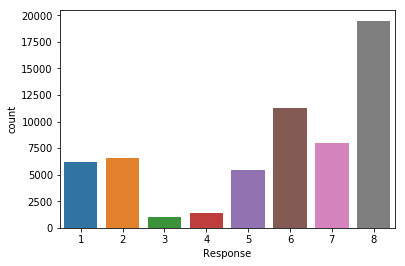

In [54]:
sns.countplot('Response',data=df_train)

In [55]:
X.shape

(59381, 126)

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')
x_sm,y_sm =smote.fit_sample(X,Y)
print(x_sm.shape,y_sm.shape)

(77857, 126) (77857,)


In [57]:
from collections import Counter
Counter(y_sm)

Counter({1: 6207,
         2: 6552,
         3: 19489,
         4: 1428,
         5: 5432,
         6: 11233,
         7: 8027,
         8: 19489})

**Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.**

In [0]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X,Y)

In [59]:
from collections import Counter
Counter(y_res)

Counter({1: 13024,
         2: 12205,
         3: 18762,
         4: 18604,
         5: 14139,
         6: 6129,
         7: 10264,
         8: 1805})

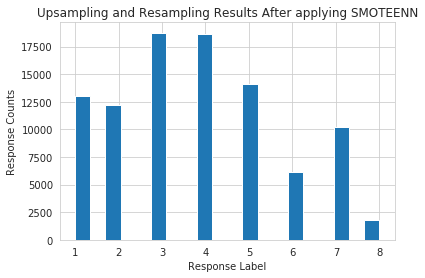

In [60]:
sns.set_style('whitegrid')
plt.hist(y_res,bins=20)
plt.xlabel('Response Label')
plt.ylabel('Response Counts')
plt.title('Upsampling and Resampling Results After applying SMOTEENN')
plt.show()

In [61]:
X_res.shape

(94932, 126)

In [0]:
X.shape

(59381, 126)

In [0]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
#
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#
from sklearn.pipeline import Pipeline
#
from sklearn.utils import resample

#### Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#
import warnings
warnings.filterwarnings("ignore")

In [0]:
X = X_res
Y = y_res

# DATA NORMALIZATION

In [0]:
scaled = MinMaxScaler()
X_scaled = scaled.fit_transform(X)

In [65]:
X_scaled.shape

(94932, 126)

In [66]:
X_scaled

array([[0.        , 0.83333333, 0.68571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.88888889, 0.68571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38888889, 0.68571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.94444444, 0.68571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.68571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.94444444, 0.68571429, ..., 0.        , 0.        ,
        0.        ]])

# TRAIN TEST SPLIT the input data set

In [0]:
#Y = df_train['Response'].values

In [67]:
Y.shape

(94932,)

In [68]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

print('training data set shape : ',X_train.shape)
print('test data set shape : ',X_test.shape)

training data set shape :  (75945, 126)
test data set shape :  (18987, 126)


**Apply classic Multilabel Classification Algorithms on the upsampled data**

In [0]:
# Spot Check some Classification  Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SGD", SGDClassifier()))
# Test options and evaluation metric
num_folds =10
seed = 1
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print('='*80)
    print('Training Accuracy ')
    print('='*80)
    print(msg) 
    print('='*80)

Training Accuracy 
LR - results(mean) : 0.540246 -results(std): 0.004674
Training Accuracy 
KNN - results(mean) : 0.813273 -results(std): 0.005265
Training Accuracy 
DT - results(mean) : 0.698571 -results(std): 0.005251
Training Accuracy 
NB - results(mean) : 0.304483 -results(std): 0.003163
Training Accuracy 
SGD - results(mean) : 0.475015 -results(std): 0.025811


In [0]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [0]:
accuracy_score(y_test,knn_pred)

0.8296729341128141

**Applying on Tes Data**

In [0]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
New_Data = df_test.drop('Id',axis=1)
print(New_Data.isnull().sum()[New_Data.isnull().sum() !=0])
encoder = LabelEncoder()
encode_label = encoder.fit_transform(New_Data['Product_Info_2'])
encode_label

New_Data['Product_Info_2'] = encode_label

X = New_Data.values

X.shape

scaled_1 = MinMaxScaler()
X_scaled_1 = scaled_1.fit_transform(X)

Series([], dtype: int64)


In [0]:
Response_labels = knn.predict(X_scaled_1)

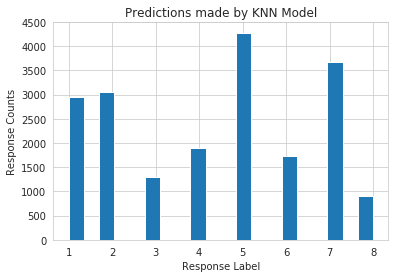

In [0]:
sns.set_style('whitegrid')
plt.hist(Response_labels,bins=20)
plt.xlabel('Response Label')
plt.ylabel('Response Counts')
plt.title('Predictions made by KNN Model')
plt.show()

**Since DataSet  has imbalanced labels deriving Class Weights**

In [0]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [0]:
class_weights

array([1.20519586, 1.13624187, 7.25030525, 5.1860262 , 1.37772622,
       0.65780436, 0.92506621, 0.37988612])

In [0]:
class_wt  = {}
for i,j in enumerate(class_weights):
  class_wt[i+1] =j

In [0]:
class_wt

{1: 1.2051958595494217,
 2: 1.136241867585151,
 3: 7.25030525030525,
 4: 5.186026200873362,
 5: 1.3777262180974479,
 6: 0.6578043646837266,
 7: 0.9250662096899829,
 8: 0.37988612372848823}

**Applying Class weights for imbalance data sets and experimenting on LogisticReGression and RandomForest classifiers**

In [0]:
from collections import Counter
dict1 = dict(Counter(Y))
dict1

{1: 6207, 2: 6552, 3: 1013, 4: 1428, 5: 5432, 6: 11233, 7: 8027, 8: 19489}

In [0]:
X_train.shape

(47504, 126)

**Spot Check some Classification  Algorithms**

In [0]:
# Spot Check some Classification  Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SGD", SGDClassifier()))
# Test options and evaluation metric
num_folds =10
seed = 1
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg) 

LR - results(mean) : 0.479139 -results(std): 0.005844
KNN - results(mean) : 0.383041 -results(std): 0.006865
DT - results(mean) : 0.435626 -results(std): 0.003945
NB - results(mean) : 0.345908 -results(std): 0.005790
SGD - results(mean) : 0.390536 -results(std): 0.005645


In [0]:
r= []
for i in results:
  r.append(i[0])

In [0]:
r

[0.4746369185434645,
 0.395074721111345,
 0.44180172595243106,
 0.35108398231951166,
 0.395706167122711]

In [0]:
d = pd.DataFrame({'Models':names,'Results':r})

# Visualize the Comparison of algorithms using Box Plot

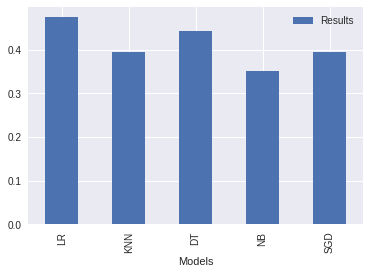

In [0]:
d.set_index('Models').plot(kind='bar')

#### Logistic Regression has better accuracy as compared to other algorithms but the accuracy is only 47%

**lightgbm**

In [86]:
import lightgbm as lgb
params = {
          "objective" : "multiclass",
          "num_class" : 9,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(params, d_train, 100)
clf.feature_importance()

array([ 180, 2236,  281, 2594,   35,  261,   48, 1903,  842, 1290, 3482,
        773,  901,  367,  376,  174,  771,  482,  346,  768,  194,  405,
       1260,  478,  337,  334,  376,  375,  611,  227,  404,  210,  644,
        620,  853,  900,  547, 1683, 1429,  196,  794,  283,  112,  242,
        210,  267,    8,   76,  132,  935,   73, 1726,  245,  148,  364,
        140,  301,  161,   77, 1085,  333,  196,   73,  124,  528,  337,
        717,   69,   62,  501,  128,    8,  181,  128,   60,  489,  427,
        431,   41,   18, 1414,   10,   35,   69,   58,   12,   31,   69,
        126,   68,   21,   59,  405,   38,   32,   21,    0,   41,   36,
        101,  277,  120,  113,   56,   31,   30,   59,   47,  101,   59,
         26,   44,   24,   37,  360,  211,   12,   88,  101,  119,    8,
         14,   30,   26,   50,   88])

In [0]:
#Prediction
y_pred=clf.predict(X_test)

In [0]:
predictions = []
for items in y_pred:
  #print(len(items))
  #print(items)
  predictions.append(np.argmax(items))
 

In [89]:
len(predictions)

18987

In [90]:
accuracy_score(y_test,predictions)

0.6378574814346658

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.51      0.45      0.48      2640
           2       0.53      0.36      0.43      2557
           3       0.82      0.76      0.78      3724
           4       0.72      0.88      0.79      3706
           5       0.61      0.71      0.66      2835
           6       0.62      0.21      0.32      1170
           7       0.50      0.74      0.60      1992
           8       0.72      0.48      0.58       363

   micro avg       0.64      0.64      0.64     18987
   macro avg       0.63      0.57      0.58     18987
weighted avg       0.64      0.64      0.62     18987



In [93]:
!pip install scikit-plot

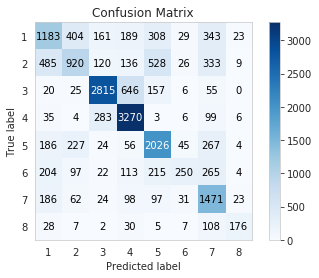

In [94]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predictions)

**LIGHTGBM has proved to yield a bettertraining  accuracy score of  64 % which is far better as compared to Logistic Regression**

# Comparing ensemble algorithms

#### What is an ensemble method?


The idea here is to train multiple models, each with the objective to predict or classify a set of results.

Most of the errors from a model’s learning are from three main factors:

* variance, 

* noise, and 

* bias. 


By using ensemble methods, we are able to increase the stability of the final model and reduce the errors mentioned previously. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source.

The main principle behind ensemble modelling is to group weak learners together to form one strong learner.

From many, together they emerge as one.

#### There are three main terms describing the ensemble (combination) of various models into one more effective model:

* Bagging to decrease the model’s variance;

* Boosting to decreasing the model’s bias, and;

* Stacking to increasing the predictive force of the classifier.



In [69]:
# Compare Algorithms

pipelines = []
pipelines.append(("AB",
                  Pipeline([("AB", AdaBoostClassifier())])))
pipelines.append(("GBM",
                  Pipeline([("GBM", GradientBoostingClassifier())])))
pipelines.append(("RF",
                  Pipeline([("RF", RandomForestClassifier())])))
pipelines.append(("ET",
                  Pipeline([("ET", ExtraTreesClassifier())])))

results = []
names = []
num_folds = 10
#
for name,model in pipelines:
    kfold = KFold(n_splits = num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("Training Accuracy")
    print('='*80)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg)

Training Accuracy
AB - results(mean) : 0.533215 -results(std): 0.008377
Training Accuracy
GBM - results(mean) : 0.633116 -results(std): 0.006295
Training Accuracy
RF - results(mean) : 0.777339 -results(std): 0.004390
Training Accuracy
ET - results(mean) : 0.840859 -results(std): 0.005095


# **Random Forest Classifier has a test accuracy of  77.3% accuracy**

In [0]:
rf_ens = RandomForestClassifier()
rf_ens.fit(X_train,y_train)
rf_pred = rf_ens.predict(X_test)

In [73]:
accuracy_score(y_test,rf_pred)

0.784852794016959

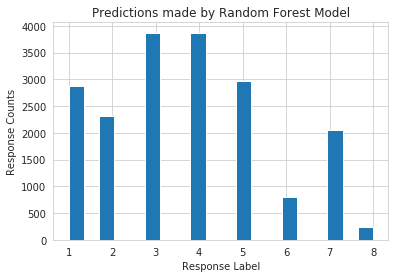

In [72]:
sns.set_style('whitegrid')
plt.hist(rf_pred,bins=20)
plt.xlabel('Response Label')
plt.ylabel('Response Counts')
plt.title('Predictions made by Random Forest Model')
plt.show()

**Extremely Randomized Tree Classifier has a training accuracy score of 84 %which i more comapred to training accuracy of 82% for KNN model**

In [0]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
et_pred = et.predict(X_test)

In [78]:
accuracy_score(y_test,et_pred)

0.8535840311792279

**Test Accuarcy score of Extremely Randomized is 85.35%**

In [139]:
print(classification_report(y_test,et_pred))

              precision    recall  f1-score   support

           1       0.77      0.82      0.79      2640
           2       0.80      0.76      0.78      2557
           3       0.94      0.98      0.96      3724
           4       0.94      0.98      0.96      3706
           5       0.82      0.86      0.84      2835
           6       0.79      0.56      0.65      1170
           7       0.79      0.79      0.79      1992
           8       0.78      0.44      0.56       363

   micro avg       0.85      0.85      0.85     18987
   macro avg       0.83      0.77      0.79     18987
weighted avg       0.85      0.85      0.85     18987



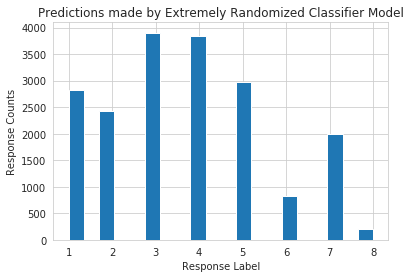

In [82]:
sns.set_style('whitegrid')
plt.hist(et_pred,bins=20)
plt.xlabel('Response Label')
plt.ylabel('Response Counts')
plt.title('Predictions made by Extremely Randomized Classifier Model')
plt.show()

**Applying Extremely Randomized Tree Classifier  to test data in order to predict labels for unseen predcitors **

In [80]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
New_Data = df_test.drop('Id',axis=1)
print(New_Data.isnull().sum()[New_Data.isnull().sum() !=0])
encoder = LabelEncoder()
encode_label = encoder.fit_transform(New_Data['Product_Info_2'])
encode_label

New_Data['Product_Info_2'] = encode_label

X = New_Data.values

X.shape

scaled_1 = MinMaxScaler()
X_scaled_1 = scaled_1.fit_transform(X)

Series([], dtype: int64)


In [0]:
et_pred_new = et.predict(X_scaled_1)

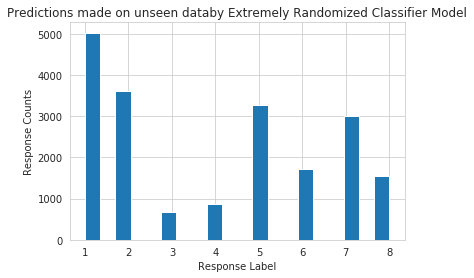

In [83]:
sns.set_style('whitegrid')
plt.hist(et_pred_new,bins=20)
plt.xlabel('Response Label')
plt.ylabel('Response Counts')
plt.title('Predictions made on unseen databy Extremely Randomized Classifier Model')
plt.show()

In [84]:
et_df = pd.read_csv('test.csv')
et_df['Response'] = et_pred_new 
et_df.head()


Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   1               1             D3              26        0.487179   
1   3               1             A2              26        0.076923   
2   4               1             D3              26        0.144667   
3   9               1             A1              26        0.151709   
4  12               1             A1              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               3               1  0.611940  0.781818   
1               2               3               1  0.626866  0.727273   
2               2               3               1  0.582090  0.709091   
3               2               1               1  0.522388  0.654545   
4               2               3               1  0.298507  0.672727   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0                   0                   0   
1    ...                      0                   0                   0   
2    ...                      0                   0                   0   
3    ...                      0                   0                   0   
4    ...                      0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         1  
1                   0                   0                   0         1  
2                   0                   0                   0         2  
3                   0                   1                   1         2  
4                   0                   0                   0         3  

[5 rows x 128 columns]

In [0]:
et_df.to_csv('et_df.csv',index=False)

In [74]:
pipelines

[('AB', Pipeline(memory=None,
       steps=[('AB', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=50, random_state=None))])),
 ('GBM', Pipeline(memory=None,
       steps=[('GBM', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
                verbose=0, warm_start=False))])),
 ('RF', Pipeline(memory=None,
       steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.

# Compare Algorithms - Visualization

In [75]:
results

[array([0.54246215, 0.52337064, 0.52942725, 0.51928901, 0.54101382,
        0.52897024, 0.54187516, 0.52804846, 0.54464051, 0.53305241]),
 array([0.63581303, 0.62567479, 0.62936142, 0.62988808, 0.63844635,
        0.63879378, 0.63655518, 0.62101659, 0.64261259, 0.63299974]),
 array([0.77406188, 0.77761685, 0.77814352, 0.7724819 , 0.77840685,
        0.7843034 , 0.7742955 , 0.77218857, 0.78575191, 0.77613906]),
 array([0.84410797, 0.84331797, 0.83726136, 0.83884134, 0.84160632,
        0.84843297, 0.84448249, 0.83263102, 0.84527258, 0.83263102])]

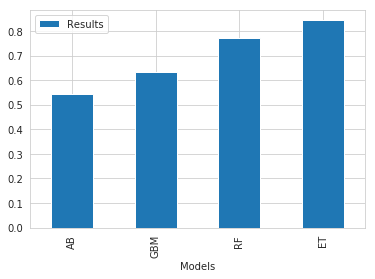

In [76]:
r= []
for i in results:
  r.append(i[0])
  
d1 = pd.DataFrame({'Models':names,'Results':r})
d1.set_index('Models').plot(kind='bar')

#### Note GBM classifier has the best accuracy as compared to other Ensemble techniques

# Using XGBOOSTClassifier Boosting Method of Ensemble model

In [0]:
from xgboost.sklearn import XGBClassifier
#set the parameters for the xgbosst model
params = {
    'objective': 'multi:softprob',
    'num_class' : 8,
    'max_depth': 2,
    'learning_rate': 1.0,
    #'silent': 1.0,
    'n_estimators': 5
}
params['eval_metric'] = ['logloss', 'auc']

# Train the XGBClassifier model

In [0]:
bst = XGBClassifier(**params).fit(X_train,y_train)

# Predict the Response

In [0]:
y_pred = bst.predict(X_test)

In [98]:
y_pred

array([8, 1, 3, ..., 5, 7, 2])

In [99]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred))

Accuracy score: 0.5485858745457418
Classification report
              precision    recall  f1-score   support

           1       0.40      0.34      0.37      2640
           2       0.44      0.25      0.32      2557
           3       0.80      0.60      0.69      3724
           4       0.70      0.80      0.74      3706
           5       0.57      0.68      0.62      2835
           6       0.35      0.23      0.27      1170
           7       0.36      0.71      0.47      1992
           8       0.48      0.29      0.37       363

   micro avg       0.55      0.55      0.55     18987
   macro avg       0.51      0.49      0.48     18987
weighted avg       0.56      0.55      0.54     18987



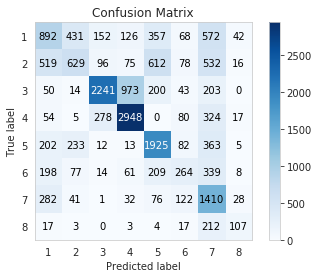

In [100]:
import scikitplot

scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

**By Far GBMClassifier has proved to have a better accuracy 57.**

# Choose Optimal Features

**Selecting best  50 features to check if selecting the important features has any effect on the accuracy**

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2,k=50)
X_train,X_test,y_train,y_test = train_test_split(X, df_train['Response'],test_size=0.2,random_state=1)
select_feature.fit(X_train,y_train)
print("Feature_List : ",X_train.columns)
print("Features Scores : ",np.round(np.array(select_feature.scores_),2))

Feature_List :  Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=126)
Features Scores :  [3.2200000e+00 6.7778000e+02 4.9594000e+02 5.7789000e+02 1.2000000e-01
 2.0560000e+01 1.6700000e+00 3.2291000e+02 9.4900000e+00 2.8279000e+02
 3.9162000e+02 2.5710000e+01 1.2660600e+03 3.9958000e+02 1.1790000e+01
 2.3810000e+01 1.0222000e+02 8.9820000e+01 1.5600000e+00 1.2530000e+01
 3.0800000e+00 2.9140000e+01 3.6131000e+02 3.9740000e+01 2.5600000e+01
 7.7430000e+01 1.4501000e+02 1.5005000e+02 4.8000000e-01 1.4829000e+02
 1.2690000e+01 3.3190000e+01 5.3820000e+01 1.1480000e+01 1.8900000e+00
 3.3

In [0]:
X_train_2 = select_feature.transform(X_train)
X_train_2.shape

(47504, 50)

In [0]:
X_test_2 = select_feature.transform(X_test)
X_test_2.shape

(11877, 50)

**ONE VERSUS REST Classifier  Implementation **

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression(),
              'SGD': SGDClassifier(loss='log', alpha=0.01, penalty='l1')}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(X_train_2, y_train)

  # predict
  predictions = classifier.predict(X_test_2)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(y_test,predictions)))
  print("="*80)
  print("classification_report_imbalanced")
  print(classification_report(y_test, predictions))
  print("="*80)   
 


Accuracy_Score for RandomForestClassifier model : 0.5348151890207965
classification_report_imbalanced
              precision    recall  f1-score   support

           1       0.37      0.15      0.22      1280
           2       0.41      0.23      0.30      1326
           3       0.48      0.45      0.47       194
           4       0.55      0.57      0.56       283
           5       0.58      0.48      0.53      1122
           6       0.44      0.47      0.45      2206
           7       0.40      0.37      0.38      1608
           8       0.64      0.89      0.75      3858

   micro avg       0.53      0.53      0.53     11877
   macro avg       0.48      0.45      0.46     11877
weighted avg       0.51      0.53      0.51     11877

Accuracy_Score for GradientBoostingClassifier model : 0.5573798097162583
classification_report_imbalanced
              precision    recall  f1-score   support

           1       0.45      0.15      0.22      1280
           2       0.45      0.2

**GradientBoostingClassifier model has outperformed other models with an accuracy score of 55.73% which is still not a very good accuracy score**

RandomForestClassifier model  has an improved accuracy _score of around 53 % from 51% after Optimum features Selection

**Attempting Recursive Feature Elimination Technique to find the most optimum parameters and then retrain the model if it outperforms GBM classifier**

In [0]:
from sklearn.feature_selection  import RFECV
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(X_train,y_train)
print("Optimal Number of Features : ",rfecv.n_features_)
print("Best Features : ",X_train.columns[rfecv.support_])

Optimal Number of Features :  68
Best Features :  Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_6', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4',
       'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1',
       'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
       'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_12', 'Medical_History_13', 'Medical_History_15',
       'Medical_History_16', 'Medical_History_18', 'Medical_History_21',
 

In [0]:
new_df = X[['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_6', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4',
       'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1',
       'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
       'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_12', 'Medical_History_13', 'Medical_History_15',
       'Medical_History_16', 'Medical_History_18', 'Medical_History_21',
       'Medical_History_23', 'Medical_History_24', 'Medical_History_25',
       'Medical_History_26', 'Medical_History_28', 'Medical_History_29',
       'Medical_History_30', 'Medical_History_33', 'Medical_History_34',
       'Medical_History_36', 'Medical_History_37', 'Medical_History_39',
       'Medical_History_40', 'Medical_History_41', 'Medical_Keyword_3',
       'Medical_Keyword_11', 'Medical_Keyword_15', 'Medical_Keyword_23',
       'Medical_Keyword_25', 'Medical_Keyword_37', 'Medical_Keyword_40',
       'Medical_Keyword_42', 'Medical_Keyword_48']]

In [0]:
new_df.head()

Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0               1              16              10        0.076923   
1               1               0              26        0.076923   
2               1              18              26        0.076923   
3               1              17              10        0.487179   
4               1              15              26        0.230769   

   Product_Info_6   Ins_Age        Ht        Wt       BMI  Employment_Info_1  \
0               1  0.641791  0.581818  0.148536  0.323008              0.028   
1               3  0.059701  0.600000  0.131799  0.272288              0.000   
2               3  0.029851  0.745455  0.288703  0.428780              0.030   
3               3  0.164179  0.672727  0.205021  0.352438              0.042   
4               3  0.417910  0.654545  0.234310  0.424046              0.027   

          ...          Medical_History_41  Medical_Keyword_3  \
0         ...                           3                  0   
1         ...                           1                  0   
2         ...                           1                  0   
3         ...                           1                  0   
4         ...                           1                  0   

   Medical_Keyword_11  Medical_Keyword_15  Medical_Keyword_23  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_25  Medical_Keyword_37  Medical_Keyword_40  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_42  Medical_Keyword_48  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 68 columns]

In [0]:
new_scaled = scaled.fit_transform(new_df)
new_scaled 

array([[0.        , 0.88888889, 0.24324324, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.67567568, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.67567568, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.67567568, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83333333, 0.24324324, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.38888889, 0.67567568, ..., 0.        , 0.        ,
        0.        ]])

In [0]:
new_scaled.shape

(59381, 68)

In [0]:
Y.shape

(59381,)

**Train Test Split the newly  created datafset with optimized features **

In [0]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(new_scaled,Y,test_size=0.2,random_state=1)

In [0]:
rf = RandomForestClassifier()
rf.fit(Xtrain,Ytrain)
rf_pred = rf.predict(Xtest)
accuracy_score(Ytest,rf_pred)

0.5077881619937694

In [0]:
gbm = GradientBoostingClassifier()
gbm.fit(Xtrain,Ytrain)
gbm_pred = gbm.predict(Xtest)
accuracy_score(Ytest,gbm_pred)

0.5615054306643091

**Trying all the classifiers for the optimum selected parameters**

In [0]:
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression(),
              'SGD': SGDClassifier(loss='log', alpha=0.01, penalty='l1')}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(Xtrain,Ytrain)

  # predict
  predictions = classifier.predict(Xtest)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(Ytest,predictions)))
  print("="*80)
  print("classification_report_imbalanced")
  print(classification_report(Ytest, predictions))
  print("="*80)   

Accuracy_Score for RandomForestClassifier model : 0.533468047486739
classification_report_imbalanced
              precision    recall  f1-score   support

           1       0.35      0.16      0.22      1280
           2       0.38      0.20      0.26      1326
           3       0.47      0.41      0.44       194
           4       0.57      0.57      0.57       283
           5       0.59      0.49      0.54      1122
           6       0.44      0.47      0.46      2206
           7       0.40      0.37      0.39      1608
           8       0.64      0.89      0.75      3858

   micro avg       0.53      0.53      0.53     11877
   macro avg       0.48      0.45      0.45     11877
weighted avg       0.50      0.53      0.50     11877

Accuracy_Score for GradientBoostingClassifier model : 0.5610002525890376
classification_report_imbalanced
              precision    recall  f1-score   support

           1       0.48      0.17      0.26      1280
           2       0.43      0.22

**Accuracy_Score for GradientBoostingClassifier model :56 %  from 55.7% after recursive feature elimination**

In [0]:
#!pip install imbalanced-learn
#conda install -c conda-forge imbalanced-learn

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


fbprophet 0.4.post2 requires setuptools-git>=1.2, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\users\\plaban_nayak\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\sklearn\\ensemble\\_gradient_boosting.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. It creates synthetic samples of the minority class.

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')
x_ = X
y_ = Y
for i in range(len(np.unique(Y))):
  x_sm,y_sm =smote.fit_sample(x_,y_)
  print(x_sm.shape,y_sm.shape)
  x_= x_sm
  y_=y_sm

(77857, 126) (77857,)
(95918, 126) (95918,)
(109975, 126) (109975,)
(123257, 126) (123257,)
(136194, 126) (136194,)
(147656, 126) (147656,)
(155912, 126) (155912,)
(155912, 126) (155912,)


In [0]:
from collections import Counter
Counter(y_sm)

Counter({1: 19489,
         2: 19489,
         3: 19489,
         4: 19489,
         5: 19489,
         6: 19489,
         7: 19489,
         8: 19489})

In [0]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X,Y)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x_,y_,test_size=0.3,random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(109138, 126) (109138,)
(46774, 126) (46774,)


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression()}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(X_train, y_train)

  # predict
  predictions = classifier.predict(X_test)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(y_test,predictions)))
  print("="*80)
  print("classification_report")
  print(classification_report(y_test, predictions))
  print("="*80)   

Accuracy_Score for RandomForestClassifier model : 0.7034249796895712
classification_report
              precision    recall  f1-score   support

           1       0.72      0.52      0.61      5798
           2       0.68      0.49      0.57      5981
           3       0.92      0.93      0.93      5812
           4       0.90      0.95      0.93      5771
           5       0.72      0.72      0.72      5904
           6       0.53      0.48      0.51      5908
           7       0.55      0.68      0.61      5800
           8       0.63      0.86      0.73      5800

   micro avg       0.70      0.70      0.70     46774
   macro avg       0.71      0.70      0.70     46774
weighted avg       0.71      0.70      0.70     46774

Accuracy_Score for GradientBoostingClassifier model : 0.57762859708385
classification_report
              precision    recall  f1-score   support

           1       0.54      0.33      0.41      5798
           2       0.49      0.30      0.37      5981
  

**Accuracy_Score for ExtraTreesClassifier model improved to : 75%  from 49.9 % after doing Synthetic  Minority Sampling **

**Extremely Randomized Trees**
ExtraTrees:

* builds multiple trees with bootstrap = False by default, which means it samples without replacement

* nodes are split based on random splits among a random subset of the features selected at every node

In Extra Trees, randomness doesn’t come from bootstrapping of data, but rather comes from the random splits of all observations.

In [0]:
from sklearn.model_selection import GridSearchCV


print('training data set shape : ',X_train.shape)
print('test data set shape : ',X_test.shape)
et = ExtraTreesClassifier()

hyperparameters = dict(n_estimators=[10,50,100,150], max_depth = [2,5,10,15])
etgscv = GridSearchCV(et, hyperparameters, cv=5)
etgscv.fit(X_train,y_train)

training data set shape :  (109138, 126)
test data set shape :  (46774, 126)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150], 'max_depth': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
etgscv.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=15, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
predictions = etgscv.best_estimator_.predict(X_test)

In [0]:
accuracy_score(y_test,predictions)

0.5894086458288793

*Trying to do Hyperparemeter tuning on the oversampled data*

In [0]:
rf = RandomForestClassifier()

hyperparameters = dict(n_estimators=[10,50,100,150], max_depth = [2,5,10,15])
etgscv = GridSearchCV(rf, hyperparameters, cv=5)
etgscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150], 'max_depth': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
 etgscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rf_pred =  etgscv.best_estimator_.predict(X_test)

In [0]:
accuracy_score(y_test,rf_pred)

0.6362081498268268

In [0]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           1       0.66      0.42      0.51      5798
           2       0.63      0.35      0.45      5981
           3       0.88      0.80      0.84      5812
           4       0.81      0.89      0.85      5771
           5       0.62      0.70      0.66      5904
           6       0.49      0.46      0.47      5908
           7       0.48      0.61      0.53      5800
           8       0.59      0.88      0.71      5800

   micro avg       0.64      0.64      0.64     46774
   macro avg       0.65      0.64      0.63     46774
weighted avg       0.64      0.64      0.63     46774



**Random Forest is Yielding a compartively Better Accuracy hence predicting the labels for test data with Random Forest Classifier **

*Preprocessing Test Data*

In [0]:
print(df_test.shape)
print(df_test.columns)

(19765, 127)
Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=127)


*Detecting Null Values*

In [0]:
New_Data = df_test.drop('Id',axis=1)
New_Data.isnull().sum()[New_Data.isnull().sum() !=0]

Series([], dtype: int64)

In [0]:
for i in New_Data.columns:
  if New_Data[i].dtypes == 'object':
    print(i)

Product_Info_2


In [0]:
encode_label = encoder.fit_transform(New_Data['Product_Info_2'])
encode_label

New_Data['Product_Info_2'] = encode_label


In [0]:
New_Data.head()

Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0               1              16              26        0.487179   
1               1               1              26        0.076923   
2               1              16              26        0.144667   
3               1               0              26        0.151709   
4               1               0              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               3               1  0.611940  0.781818   
1               2               3               1  0.626866  0.727273   
2               2               3               1  0.582090  0.709091   
3               2               1               1  0.522388  0.654545   
4               2               3               1  0.298507  0.672727   

         Wt         ...          Medical_Keyword_39  Medical_Keyword_40  \
0  0.338912         ...                           0                   0   
1  0.311715         ...                           0                   0   
2  0.320084         ...                           0                   0   
3  0.267782         ...                           0                   0   
4  0.246862         ...                           0                   0   

   Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_47  Medical_Keyword_48  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   1                   1  
4                   0                   0  

[5 rows x 126 columns]

In [0]:
X = New_Data.values

X.shape

(19765, 126)

In [0]:
scaled_1 = MinMaxScaler()
X_scaled_1 = scaled_1.fit_transform(X)

In [0]:
etgscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rf_labels =  etgscv.best_estimator_.predict(X_scaled_1)

In [0]:
df_test['Response'] = rf_labels

**VISUALIZATION OF LABELS PREDICTED BY RANDOMFOREST Classifier**

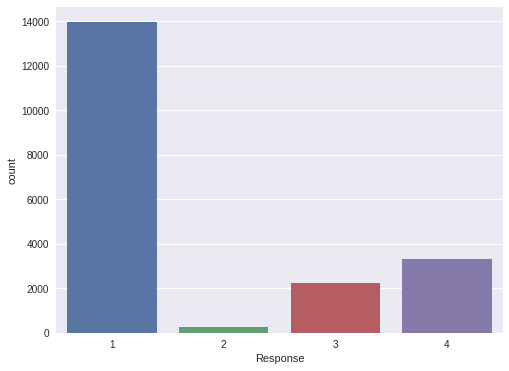

In [0]:
sns.countplot('Response',data=df_test)

In [0]:
df_test.to_csv('RF_Response_labels.csv',index=False)

**Evaluate Aritificial Neural Networks using KERAS**

In [101]:
from keras import losses
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.callbacks import Callback

Using TensorFlow backend.


**Build an encoder decoder model for feature optimization**

In [102]:
model = Sequential()
model.add(Dense(512,  activation='relu', input_shape=(126,)))
model.add(Dense(256,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
#trap the next encoded sequence 
model.add(Dense(16,    activation='relu', name="encoder"))
model.add(Dense(32,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(256,  activation='relu'))
model.add(Dense(512,  activation='relu'))
model.add(Dense(126,  activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               65024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
encoder (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
__________

Build a Neural network to decode the encoded items 

In [127]:
clf_model = Sequential()

clf_model.add(Dense(512, input_dim=16, kernel_initializer='normal', activation='relu'))
#Layer 1
clf_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
clf_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
#clf_model.add(Dropout(0.2))
#Layer 2
clf_model.add(Dense(64, kernel_initializer='normal', activation='relu'))
clf_model.add(Dense(32, kernel_initializer='normal', activation='relu'))
#clf_model.add(Dropout(0.2))
#FCNN
clf_model.add(Dense(16, kernel_initializer='normal', activation='relu'))
clf_model.add(Dense(8, kernel_initializer='normal', activation='softmax'))

clf_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               8704      
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
Total para

In [105]:
model.compile(loss='binary_crossentropy', optimizer = "adam")
history = model.fit(X_train, X_train, batch_size=256, epochs=25, verbose=1, 
                    validation_data=(X_test, X_test))
    
   

Instructions for updating:
Use tf.cast instead.


Train on 75945 samples, validate on 18987 samples
Epoch 1/25
75945/75945 [==============================] - 5s 63us/step - loss: 0.2638 - val_loss: 0.2337
Epoch 2/25
75945/75945 [==============================] - 2s 26us/step - loss: 0.2170 - val_loss: 0.2097
Epoch 3/25
75945/75945 [==============================] - 2s 27us/step - loss: 0.2064 - val_loss: 0.2049
Epoch 4/25
75945/75945 [==============================] - 2s 27us/step - loss: 0.2025 - val_loss: 0.2011
Epoch 5/25
75945/75945 [==============================] - 2s 27us/step - loss: 0.1978 - val_loss: 0.1964
Epoch 6/25
75945/75945 [==============================] - 2s 27us/step - loss: 0.1947 - val_loss: 0.1940
Epoch 7/25
75945/75945 [==============================] - 2s 26us/step - loss: 0.1905 - val_loss: 0.1886
Epoch 8/25
75945/75945 [==============================] - 2s 26us/step - loss: 0.1866 - val_loss: 0.1869
Epoch 9/25
75945/75945 [==============================] - 2s 27us/step - loss: 0.1846 - val_loss: 0.1848
Epoch

In [0]:
encoder = Model(model.input, model.get_layer('encoder').output)
x_auto_train= encoder.predict(X_train)
x_auto_test= encoder.predict(X_test)

In [107]:
x_auto_test.shape

(18987, 16)

In [108]:
x_auto_train.shape

(75945, 16)

In [0]:
#df_y_sm = pd.DataFrame({'Y_SM':y_sm})
df_y_sm = pd.DataFrame({'Y_SM':y_train})

In [0]:
ytest_sm = pd.get_dummies(df_y_sm['Y_SM'])

In [0]:
y_sm = np.array(ytest_sm)

In [112]:
y_sm.shape

(75945, 8)

In [0]:
df_y_test_sm = pd.DataFrame({'Y_SM':y_test})
ytest_sm = pd.get_dummies(df_y_test_sm['Y_SM'])
y_test_sm = np.array(ytest_sm)

In [114]:
y_test_sm.shape

(18987, 8)

In [115]:
X_test.shape

(18987, 126)

In [0]:
class myCallback(Callback):
  def on_epoc_end(self,epoch,logs={}):
    if(logs.get('acc') >= 0.889):
      print("\nReached the desired accuracy so canceling the training!")
      self.model.stop_training =True

In [0]:
callbacks = myCallback()

**Estimate class weights for unbalanced datasets.**

In [0]:
# Calculate the weights for each class so that we can balance the data
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced',
                                            np.unique(y_train),
                                            y_train)

In [129]:
# initiate RMSprop optimizer

clf_model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#history = clf_model.fit(X_train, y_sm, batch_size=30, class_weight=weights,epochs=25, verbose=1, validation_data=(X_test, y_test_sm),callbacks=[callbacks])
history = clf_model.fit(x_auto_train, y_sm, epochs=30, validation_data=(x_auto_test, y_test_sm),verbose=1,callbacks=[callbacks])





Train on 75945 samples, validate on 18987 samples
Epoch 1/30
75945/75945 [==============================] - 11s 143us/step - loss: 0.3029 - acc: 0.8772 - val_loss: 0.3120 - val_acc: 0.8703
Epoch 2/30
75945/75945 [==============================] - 10s 136us/step - loss: 0.2904 - acc: 0.8804 - val_loss: 0.3009 - val_acc: 0.8780
Epoch 3/30
75945/75945 [==============================] - 10s 137us/step - loss: 0.2867 - acc: 0.8813 - val_loss: 0.2935 - val_acc: 0.8814
Epoch 4/30
75945/75945 [==============================] - 10s 136us/step - loss: 0.2841 - acc: 0.8823 - val_loss: 0.2845 - val_acc: 0.8820
Epoch 5/30
75945/75945 [==============================] - 10s 136us/step - loss: 0.2821 - acc: 0.8830 - val_loss: 0.2911 - val_acc: 0.8766
Epoch 6/30
75945/75945 [==============================] - 10s 137us/step - loss: 0.2806 - acc: 0.8835 - val_loss: 0.2980 - val_acc: 0.8788
Epoch 7/30
75945/75945 [==============================] - 11s 145us/step - loss: 0.2793 - acc: 0.8839 - val_loss: 0.

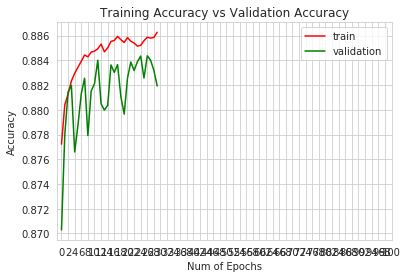

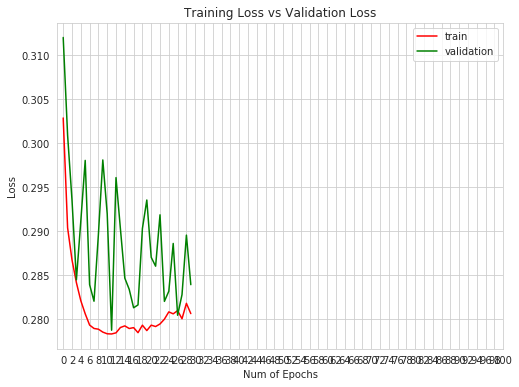

In [130]:
# Plots for training and testing process: loss and accuracy
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

In [131]:
predictions = clf_model.predict(x_auto_test, batch_size=256, verbose=1)


    

18987/18987 [==============================] - 0s 12us/step


In [132]:
np.argmax(predictions[0])

7

In [133]:
np.argmax(y_test_sm[0])

0

In [0]:
y_pred = np.argmax(predictions,axis = 1) + 1

In [135]:
y_pred

array([8, 1, 4, ..., 5, 5, 1])

In [136]:
np.unique(y_pred)

array([1, 2, 3, 4, 5, 6, 7, 8])

**Accuracy of test  predictions generated by the Keras Model**

In [137]:
print(accuracy_score(y_test,y_pred))

0.415810817928056


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.30      0.62      0.41      2640
           2       0.35      0.09      0.14      2557
           3       0.62      0.37      0.47      3724
           4       0.53      0.77      0.63      3706
           5       0.34      0.36      0.35      2835
           6       0.39      0.10      0.16      1170
           7       0.36      0.25      0.29      1992
           8       0.28      0.39      0.32       363

   micro avg       0.42      0.42      0.42     18987
   macro avg       0.40      0.37      0.35     18987
weighted avg       0.43      0.42      0.39     18987



**Applying ANN For Classification in order to generate labels for test data**

In [0]:
X_scaled_1.shape

(19765, 126)

**Predicting Response Labels for Test Data**

In [0]:

x_auto_train_unseen = encoder.predict(X_scaled_1)

In [141]:
x_auto_train_unseen.shape

(19765, 16)

In [142]:
predictions = clf_model.predict(x_auto_train_unseen,batch_size=256,verbose=1)

19765/19765 [==============================] - 0s 4us/step


In [0]:
Response = np.argmax(predictions,axis = 1) + 1

In [0]:
df_test['Response'] = Response

In [145]:
df_test.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   1               1             D3              26        0.487179   
1   3               1             A2              26        0.076923   
2   4               1             D3              26        0.144667   
3   9               1             A1              26        0.151709   
4  12               1             A1              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               3               1  0.611940  0.781818   
1               2               3               1  0.626866  0.727273   
2               2               3               1  0.582090  0.709091   
3               2               1               1  0.522388  0.654545   
4               2               3               1  0.298507  0.672727   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0                   0                   0   
1    ...                      0                   0                   0   
2    ...                      0                   0                   0   
3    ...                      0                   0                   0   
4    ...                      0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         1  
1                   0                   0                   0         3  
2                   0                   0                   0         1  
3                   0                   1                   1         1  
4                   0                   0                   0         1  

[5 rows x 128 columns]

In [146]:
df_test.shape

(19765, 128)

**Visualization of the Response Labels Predicted**

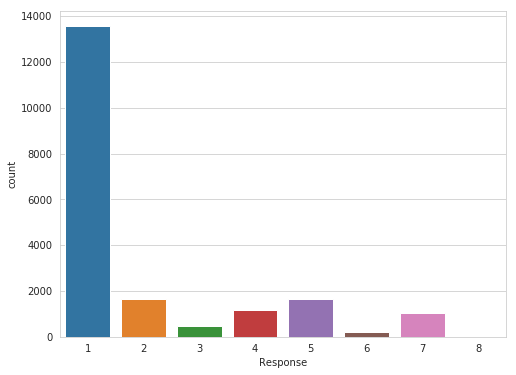

In [147]:
sns.countplot('Response',data=df_test)

In [0]:
df_test.to_csv('ANN_Respone_predicted.csv',index=False)

**CONCLUSION **

Extremely Randomized Trees Classifier Algorithm gave the highest accuracy of85.35%  on test data as compared to all the other  Machine Learning Models applied.

The ANN model using Keras returned a test accuracy_score of 41.58%